In [5]:
##IMFORMACION RELEVANTE.
##ESTE PROGRAMA GENERA FICHEROS CON DATOS. SOLAMENTE ES NECESARIO EJECUTAR LA FUNCION menuSeleccion() Y PEDIR LO 
##QUE SE NECESITA. SE MUESTRAN LAS ESTADISTICAS DE TODOS LOS DATOS RELEVANTES.

import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import pandas as pd
from scipy import stats
from collections import Counter
import csv

In [6]:
## Función para carga de datos: 
def load_pandas():
    df_gme = pd.read_csv("data/GME_Historical_Data.csv",encoding = "ISO-8859-1")
    date_gme = df_gme.iloc[0:]["Date"]
    price_gme = df_gme.iloc[0:]["Price"]
    op_gme = df_gme.iloc[0:]["Open"]
    high_gme = df_gme.iloc[0:]["High"]
    low_gme = df_gme.iloc[0:]["Low"]
    vol_gme = df_gme.iloc[0:]["Vol."]
    change_gme = df_gme.iloc[0:]["Change %"]
    
    vol_gme_i=[]
    for i in np.array(vol_gme):
        if (i != "-"):
            vol_gme_i.append(i.strip('M'))
    
    vol_gme_ii=[]
    for i in np.array(vol_gme_i):
        if (i != "-"):
            vol_gme_ii.append(float(i.strip('K')))
        
    change_gme_i=[]
    for i in np.array(change_gme):
        if (i != "-"):
            change_gme_i.append(float(i.strip('%')))
    
    df_sne = pd.read_csv("data/SNE_Historical_Data.csv",encoding = "ISO-8859-1")
    date_sne = df_sne.iloc[0:]["Date"]
    price_sne = df_sne.iloc[0:]["Price"]
    op_sne = df_sne.iloc[0:]["Open"]
    high_sne = df_sne.iloc[0:]["High"]
    low_sne = df_sne.iloc[0:]["Low"]
    vol_sne = df_sne.iloc[0:]["Vol."]
    change_sne = df_sne.iloc[0:]["Change %"]
    
    vol_sne_i=[]
    for i in np.array(vol_sne):
        if (i != "-"):
            vol_sne_i.append(i.strip('M'))
    
    vol_sne_ii=[]
    for i in np.array(vol_sne_i):
        if (i != "-"):
            vol_sne_ii.append(float(i.strip('K')))
        
    change_sne_i=[]
    for i in np.array(change_sne):
        if (i != "-"):
            change_sne_i.append(float(i.strip('%')))
    
    
    data_gme = [price_gme,op_gme,high_gme,low_gme,vol_gme_ii,change_gme_i]
    data_sne = [price_sne,op_sne,high_sne,low_sne,vol_sne_ii,change_sne_i]
    
    return data_gme,data_sne,date_gme,date_sne

In [7]:
# Función para extraer las estadisticas:
def measures(data):
    avg = st.mean(data)
    med = st.median(data)
    f_med = st.median_low(data)
    l_med = st.median_high(data)
    interqu_range = l_med - f_med
    
    pstdev = st.pstdev(data)
    pvar = st.pvariance(data)
    stdev = st.stdev(data)
    var = st.variance(data)
    
    return {
        "Mean": avg,
        "Median": med,
        "First Quartile": f_med,
        "Third Quartile": l_med,
        "Interquartile Range": interqu_range,
        "Population Standard Deviation": pstdev,
        "Population Variance": pvar,
        "Sample Standard Deviation": stdev,
        "Sample Variance": var
    }

# Ejemplo de como se utiliza:
gme_price_stats = measures(data_gme[0])
print("GameStop Price Statistics:")
for key, value in gme_price_stats.items():
    print(f"{key}: {value}")


GameStop Price Statistics:
Mean: 12.135602564102564
Median: 10.46
First Quartile: 10.45
Third Quartile: 10.47
Interquartile Range: 0.02000000000000135
Population Standard Deviation: 21.38663584076828
Population Variance: 457.38819258563444
Sample Standard Deviation: 21.400358418914774
Sample Variance: 457.9753404580165


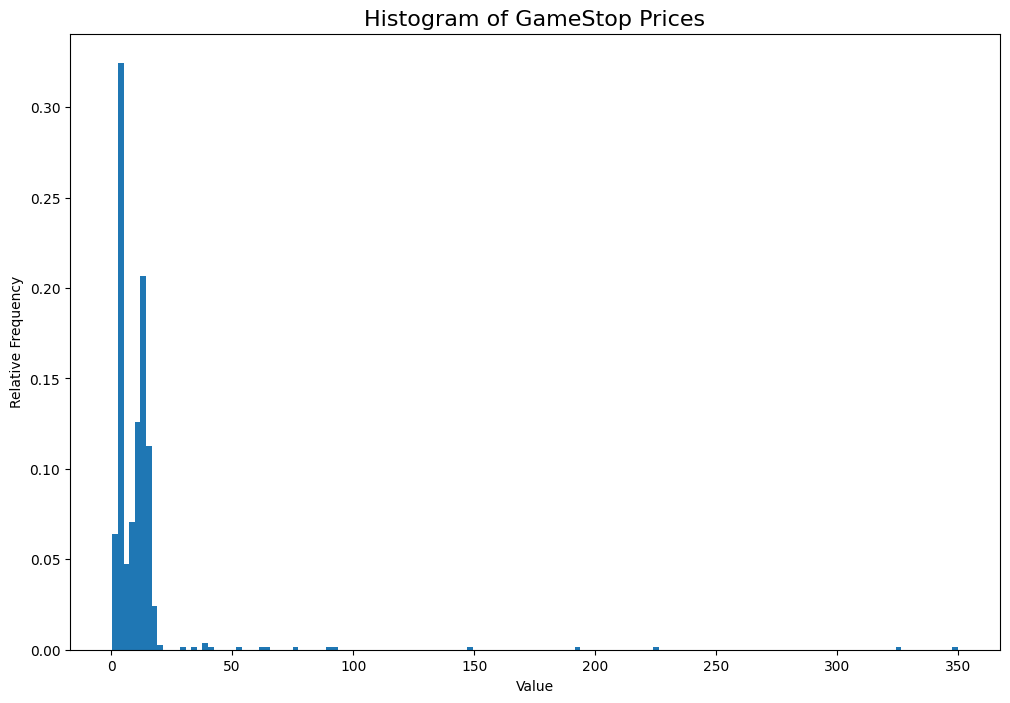

In [8]:
# Función para dibujar un histograma:
def draw_hist_rel_frec(data, title):
    res = stats.relfreq(data, numbins=150, defaultreallimits=None, weights=None)
    x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size, res.frequency.size)
    
    plt.figure(figsize=(12, 8))
    plt.bar(x, res.frequency, width=res.binsize)
    plt.title(title, fontsize=16)
    plt.xlabel("Value")
    plt.ylabel("Relative Frequency")
    plt.show()

# Example usage
draw_hist_rel_frec(data_gme[0], "Histogram of GameStop Prices")

In [9]:
# Función Tabla de Frecuencia: 
def frec_table(data, title):
    data = pd.Series(data).dropna()  # Convert to Series and drop NaN values
    data = data.sort_values()
    
    value_counts = data.value_counts().sort_index()
    freq_rel = value_counts / len(data)
    freq_abs_ac = value_counts.cumsum()
    freq_rel_ac = freq_rel.cumsum()
    
    df = pd.DataFrame({
        "Value": value_counts.index,
        "Absolute Frequency": value_counts.values,
        "Relative Frequency": freq_rel.values,
        "Cumulative Absolute Frequency": freq_abs_ac.values,
        "Cumulative Relative Frequency": freq_rel_ac.values
    })
    
    print(df)
    return df

# Example usage
gme_price_freq_table = frec_table(data_gme[0], "Frequency Table of GameStop Prices")

      Value  Absolute Frequency  Relative Frequency  \
0      2.80                   1            0.001282   
1      2.85                   1            0.001282   
2      3.09                   1            0.001282   
3      3.21                   1            0.001282   
4      3.25                   1            0.001282   
..      ...                 ...                 ...   
558  147.98                   1            0.001282   
559  193.60                   1            0.001282   
560  225.00                   1            0.001282   
561  325.00                   1            0.001282   
562  347.51                   1            0.001282   

     Cumulative Absolute Frequency  Cumulative Relative Frequency  
0                                1                       0.001282  
1                                2                       0.002564  
2                                3                       0.003846  
3                                4                       0.005128  

In [13]:
# Función de analisis:
def analyze_stock_data(data, stock_name):
    metrics = ["Price", "Open", "High", "Low", "Volume", "Change %"]
    
    print(f"Analysis of {stock_name} Stock Data")
    print("=" * 40)
    
    for i, metric in enumerate(metrics):
        print(f"\n{metric} Analysis:")
        print("-" * 20)
        
        # Calculate and print statistics
        stats = measures(data[i])
        for key, value in stats.items():
            print(f"{key}: {value:.4f}")
        
        # Draw histogram
        draw_hist_rel_frec(data[i], f"Histogram of {stock_name} {metric}")
        
        # Generate frequency table
        frec_table(data[i], f"Frequency Table of {stock_name} {metric}")
        
        print("\n")

In [11]:
def comprobarOpcion():
    while (True):
        val = input("Seleccione una opción: ")
        if val not in ["1","2","3"]:
            print("Seleccione una opcion válida")
        else:
            return val

def menuSeleccion():
    op = ["Price","Open","High","Low","Vol","Change %"]
    print("----------- INTERFAZ ESTADISTICA PRACTICA 1 -----------")
    print("Seleccione la operación a realizar: ")
    print("1. Analisis de datos de GameStop")
    print("2. Analisis de datos de Sony (división de videojuegos)")
    print("3. Cerrar la interfaz")
    print("\n")
    
    val = comprobarOpcion()
    
    if (int(val) == 1):
        data = load_pandas()
        gamestop = data[0]
        print("Cargando datos seleccionados...")
        print("\n")
        print("----------- Analisis de GameStop -----------")
        print("1. Calculo de medidas estadisticas")
        print("2. Dibujo de histograma de frecuencias relativas")
        print("3. Tabla de frecuencias")
        print("\n")
        val = comprobarOpcion()
        
        if (int(val) == 1):
            print("\n")
            datos  = []
            for i in range(0,len(gamestop)):
                print("MEDIDA " + str(i+1) + " : " + op[i])
                print("\n")
                datos.append(measures(gamestop[i]))
                print("\n")
            excelWriter(datos,"Medidas estadisticas de GameStop")
            print("Se ha generado un fichero csv con los datos")
            menuSeleccion()
            
        elif (int(val) == 2):
            for i in range(0,len(gamestop)):
                print("HISTOGRAMA " + str(i+1) + " : " + op[i])
                draw_hist_rel_frec(gamestop[i],"Histograma de frecuencias relativas: " + op[i])
            menuSeleccion()
        
        elif (int(val) == 3):
            frec_table(list(gamestop[0]),"Tabla de frecuencias de GameStop")
            print("Se ha generado un fichero csv con los datos")
            menuSeleccion()
    
    elif (int(val) == 2):
        data = load_pandas()
        sony = data[1]
        print("Cargando datos seleccionados...")
        print("\n")
        print("----------- Analisis de Sony -----------")
        print("1. Calculo de medidas estadisticas")
        print("2. Dibujo de histograma")
        print("3. Tabla de frecuencias")
        print("\n")
        val = comprobarOpcion()
        
        if (int(val) == 1):
            print("\n")
            datos = []
            for i in range(0,len(sony)):
                print("MEDIDA " + str(i+1) + " : " + op[i])
                print("\n")
                datos.append(measures(sony[i]))
                print("\n")
            excelWriter(datos,"Medidas estadisticas de Sony")
            print("Se ha generado un fichero csv con los datos")
            menuSeleccion()
            
        elif (int(val) == 2):
            for i in range(0,len(sony)):
                print("HISTOGRAMA " + str(i+1) + " : " + op[i])
                draw_hist_rel_frec(sony[i],"Histograma de frecuencias relativas: " + op[i])
            menuSeleccion()
        
        elif (int(val) == 3):
            frec_table(list(sony[0]),"Tabla de frecuencias de Sony")
            print("Se ha generado un fichero csv con los datos")
            menuSeleccion()
    
    elif (int(val) == 3):
        print("Saliendo...")
        return


def measures(data):
    avg = st.mean(data)
    med = st.median(data)
    f_med = st.median_low(data)      ##PRIMER CUARTIL
    l_med = st.median_high(data)     ##SEGUNDO CUARTIL
    interqu_range = l_med - f_med    ##RANGO INTERCUARTILICO
    
    pstdev = st.pstdev(data)         ##DESVIACION MEDIA
    pvar = st.pvariance(data)        ##VARIANZA
    stdev = st.stdev(data)           ##DESVIACION MUESTRAL
    var = st.variance(data)          ##VARIANZA MUESTRAL
    
    print("MEDIA: " + str(avg))
    print("MEDIANA: " + str(med))
    print("PRIMER CUARTIL: " + str(f_med))
    print("TERCER CUARTIL: " + str(l_med))
    print("RECORRIDO INTERCUARTILICO: " + str(interqu_range))
    
    print("DESVIACION MEDIA: " + str(pstdev))
    print("VARIANZA: " + str(pvar))
    print("DESVIACION MEDIA MUESTRAL: " + str(stdev))
    print("VARIANZA MUESTRAL: " + str(var))
    
    val = [avg,med,f_med,l_med,interqu_range,pstdev,pvar,stdev,var]
    return val

def excelWriter(data,title):
    col = ["Media","Mediana","Primer Cuartil","Segundo Cuartil","Rango intercuartilico",
            "Desviacion media","Varianza","Desviacion media muestral","Varianza muestral"]
    row = ["Price","Open","High","Low","Vol","Change %"]
    df = pd.DataFrame(data,index=row,columns=col)
    df.to_csv(title,sep=";",index=True)
    
def draw_hist_rel_frec(data,title):
    res = stats.relfreq(data, numbins=150, defaultreallimits=None, weights=None)
    x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,res.frequency.size)
    fig = plt.figure(figsize=(30, 20))
    
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(x, res.frequency, width=res.binsize)
    ax.set_title(title, fontsize = 35)
    fig.patch.set_facecolor('xkcd:light grey')
    ax.set_xlim([x.min(), x.max()+5])
    plt.show()

def frec_table(data,title):
    data.sort()
    frec_rel = []
    
    header = ["VALOR","FREC. ABSOLUTA","FREC. RELATIVA","FREC. ABS. ACUMULADA","FREC. RE. ACUMULADA"]
    valor = list(Counter(data).keys())
    frec_abs = list(Counter(data).values())
    for i in range(0,len(frec_abs)): frec_rel.append(frec_abs[i]/len(data))
    frec_abs_ac = list(np.cumsum(frec_abs))
    frec_rel_ac = list(np.cumsum(frec_rel))
    
    table = [valor,frec_abs,frec_rel,frec_abs_ac,frec_rel_ac]
    df = pd.DataFrame(np.transpose(table),columns=header)
    print(df)
    df.to_csv(title,sep=";",index=False)
    

In [4]:
menuSeleccion()

----------- INTERFAZ ESTADISTICA PRACTICA 1 -----------
Seleccione la operación a realizar: 
1. Analisis de datos de GameStop
2. Analisis de datos de Sony (división de videojuegos)
3. Cerrar la interfaz


Cargando datos seleccionados...


----------- Analisis de Sony -----------
1. Calculo de medidas estadisticas
2. Dibujo de histograma
3. Tabla de frecuencias




MEDIDA 1 : Price


MEDIA: 61.172136422136425
MEDIANA: 56.32
PRIMER CUARTIL: 56.32
TERCER CUARTIL: 56.32
RECORRIDO INTERCUARTILICO: 0.0
DESVIACION MEDIA: 14.575436603836511
VARIANZA: 212.4433521924572
DESVIACION MEDIA MUESTRAL: 14.584824969772205
VARIANZA MUESTRAL: 212.7171193988908


MEDIDA 2 : Open


MEDIA: 61.185315315315314
MEDIANA: 56.45
PRIMER CUARTIL: 56.45
TERCER CUARTIL: 56.45
RECORRIDO INTERCUARTILICO: 0.0
DESVIACION MEDIA: 14.559085667710278
VARIANZA: 211.96697547972684
DESVIACION MEDIA MUESTRAL: 14.568463501640933
VARIANZA MUESTRAL: 212.240128798644


MEDIDA 3 : High


MEDIA: 61.62620334620335
MEDIANA: 56.9
PRIMER 